# Lab 4 Basics and Operators

In lab 3 we were asked to find a combination of gates such that if the initial state is $\vert \mathbf{0} \rangle$ the final state is $\vert \mathbf{-i} \rangle$. A possible circuit to do this is 
\begin{equation}
\vert\mathbf{-i}\rangle = (\mathbf{S\,S\,S\,H})\vert\mathbf{0}\rangle
\end{equation}
where $\mathbf{H}$ is the Hadamard gate and $\mathbf{S}$ is the $\sqrt{\mathbf{Z}}$ gate. Just as a reminder
\begin{equation}
\nonumber
\mathbf{H}=\frac{1}{\sqrt{2}}
\left(
\begin{matrix}
1 & 1 \\
1 &-1
\end{matrix}
\right),\quad
\mathbf{Z}=
\left(
\begin{matrix}
1 & 0 \\
0 &-1
\end{matrix}
\right),\quad \mathbf{S} = 
\left(
\begin{matrix}
1 & 0 \\
0 &i
\end{matrix}
\right)
\end{equation}
so 
\begin{equation}
\nonumber
(\mathbf{S\,S\,S\,H}) = \frac{1}{\sqrt{2}}
\left(
\begin{matrix}
1 & 1\\
-i & i\\
\end{matrix}
\right)\quad {\rm and}\quad (\mathbf{S\,S\,S\,H})\vert{\mathbf{0}}\rangle=
\vert\mathbf{-i}\rangle = \frac{1}{\sqrt{2}}
\left(
\begin{matrix}
1\\-i
\end{matrix}
\right)
\end{equation}

Doing these operations using Python, first lets import the modules

In [1]:
import math
import numpy as np

now lets define the matrices $\mathbf{H}$ and $\mathbf{Z}$ and the state $\vert\mathbf{0}\rangle$

In [2]:
H = 1/math.sqrt(2)*np.matrix([[1,1],[1,-1]])
S = np.matrix([[1, 0],[0, 0.0+1.j]])
zeroState = np.matrix([1,0])

and find $(\mathbf{S\,S\,S\,H})$ and $\vert\mathbf{-i}\rangle $

In [3]:
matrixResult = (S*S*S*H)
print("matrix Result=\n",matrixResult)

iMinusState = matrixResult*zeroState.T
print("iMinusState=\n",iMinusState)

matrix Result=
 [[0.70710678+0.j         0.70710678+0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]
iMinusState=
 [[0.70710678+0.j        ]
 [0.        -0.70710678j]]


Now lets evaluate the circuit using Qiskit

In [4]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [5]:
qc = QuantumCircuit(1) #qc is the quantim circuit with only 1 qubit
initial_state = [1,0]  # Define initial_state as |0>                                                                       \                                                                                                                     
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit                                           \
# the Hadamard gate is applied as qc.h(0) meaning                                                                                                                           
qc.h(0) # to qubit 0 in circuit qc apply the Hadamard gate h
qc.draw() # visualise what we have done so far


┌─────────────────┐┌───┐
q: ┤ Initialize(1,0) ├┤ H ├
   └─────────────────┘└───┘

Once the circuit is define we tell the simulator to save the state vector, so we can print/draw the quantum state of the circuit, create the circuit and run it. Finally we display in the Bloch sphere

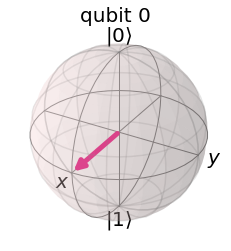

In [6]:
qc.save_statevector()   # Tell simulator to save statevector                                                                 
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run                                            
state = sim.run(qobj).result().get_statevector() # run the circuit in the simulator
plot_bloch_multivector(state) # display the state vector in the Bloch sphere


and the value of the state vector is

In [7]:
state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


For the circuit $\vert\mathbf{-i}\rangle = (\mathbf{S\,S\,S\,H})\vert\mathbf{0}\rangle$ we have

In [8]:
qc1 = QuantumCircuit(1)                                                                                                            
qc1.initialize(initial_state, 0)    
# the Hadamard gate is applied as qc.h(0) meaning                                                                                                                           
qc1.h(0) 
qc1.s(0)
qc1.s(0)
qc1.s(0)
qc1.draw() # visualise what we have don so far

┌─────────────────┐┌───┐┌───┐┌───┐┌───┐
q: ┤ Initialize(1,0) ├┤ H ├┤ S ├┤ S ├┤ S ├
   └─────────────────┘└───┘└───┘└───┘└───┘

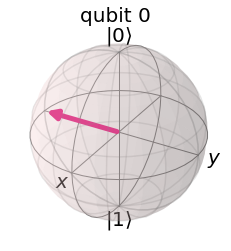

In [9]:
qc1.save_statevector()   # Tell simulator to save statevector                                                                 
qobj = assemble(qc1)     # Create a Qobj from the circuit for the simulator to run                                            
state1 = sim.run(qobj).result().get_statevector() # run the circuit in the simulator
plot_bloch_multivector(state1) # display the state vector in the Bloch sphere

In [10]:
state1

Statevector([ 0.70710678+0.j        , -0.        -0.70710678j],
            dims=(2,))


If we want to print the state vector in a more readable form we can use

In [11]:
from qiskit.visualization import array_to_latex
array_to_latex(state1, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

# Measurement
To make a measurement 

In [12]:
qc2 = QuantumCircuit(1,1)   # one qubit  and one measurement                                                                                                         
qc2.initialize(initial_state, 0)    
# the Hadamard gate is applied as qc.h(0) meaning                                                                                                                           
qc2.h(0) 
qc2.measure_all(1,0)

qc2.draw()

┌─────────────────┐┌───┐ ░ ┌─┐
  q: ┤ Initialize(1,0) ├┤ H ├─░─┤M├
     └─────────────────┘└───┘ ░ └╥┘
c: 1/════════════════════════════╩═
                                 0

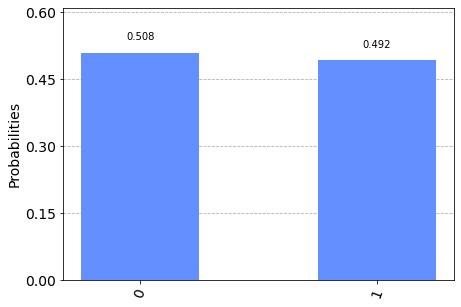

In [13]:
qobj = assemble(qc2)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts) 

Notice that when we do the measurement we get a two column plot. The columns are the measurement of the probability that we measure the state $\vert\mathbf{0}\rangle$ or the state $\vert\mathbf{1}\rangle$. If you run the above example several times, you would notice that the histogram values change a little. 

You can think this as a very simple program using a quantum program, it is a random number generator of two numbers - zero or one - (states). 

# Two qubits

Two, or more, qubits circuits is implemented as  

In [14]:
qc = QuantumCircuit(2) # the 2 in the brackets is how many qubits                                                                                                  
zero_state = [1,0] # the zero qubit, this is the default in quirk
one_state = [0,1] # the one qubit
qc.initialize(zero_state, 0) # zero qubit is in zero state
qc.initialize(one_state,1) # one qubit is in one state
qc.draw()

┌─────────────────┐
q_0: ┤ Initialize(1,0) ├
     ├─────────────────┤
q_1: ┤ Initialize(0,1) ├
     └─────────────────┘

A CNOT gate is

In [15]:
qc.cx(0,1)
qc.draw()

┌─────────────────┐     
q_0: ┤ Initialize(1,0) ├──■──
     ├─────────────────┤┌─┴─┐
q_1: ┤ Initialize(0,1) ├┤ X ├
     └─────────────────┘└───┘

if we can see what is the state at the output

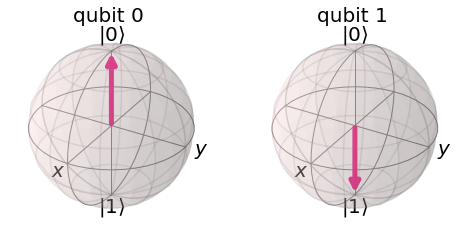

In [16]:
qc.save_statevector()                                                                    
qobj = assemble(qc)                                              
state = sim.run(qobj).result().get_statevector() 
plot_bloch_multivector(state) 

# Question 1
From the notes in the course. Create an entagled state using a CNOT and plot the bloch spheres of the output states.
Question: what is the angle on the Bloch spheres?

In [17]:
# your code goes here


# Question 2
At lecture time we looked at the following circuit

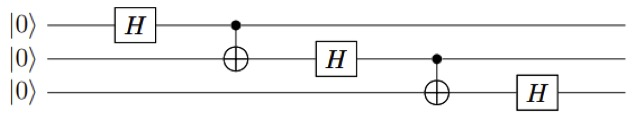

write a piece of code to evaluate the output state

In [18]:
# your code goes here



# Question 3

The half adder is described with a digital diagram 

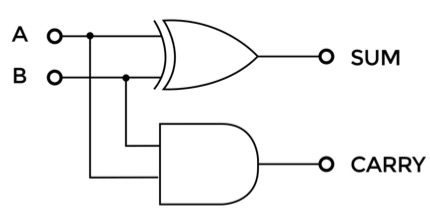


and the quantum diagram

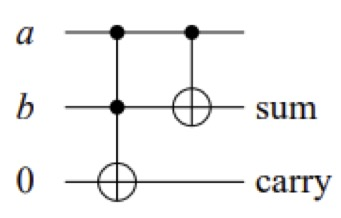

Write a piece of code to evaluate the <b>measurements</b> for the quantum half adder, change the inputs a and b, and check that the adder is working, including doing the carry over. 

In [19]:
# your code goes here
